In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import statistics
from matplotlib import pyplot as plt
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


Next we calculate the trade communities for our base scenario as well as global catastrophic infrastructure loss and abrupt sunlight reduction.

In [2]:
base_year = 2022
nuclear_winter_sizes = ["5", "16", "27", "37", "47", "150"]
crops = ["Wheat", "Rice", "Soya beans", "Maize"]

nw_crop_scenarios = {}
for crop in crops:
    scenarios = []
    base = PyTradeShifts(
        crop=crop,
        base_year=base_year,
        region="Global",
        testing=False,
        cd_kwargs={"seed": 2},
        make_plot=False,
        keep_singletons=True
    )
    if crop == "Wheat":
        xia_naming = "swheat"
    elif crop == "Rice":
        xia_naming = "rice"
    elif crop == "Soya Beans":
        xia_naming = "soy"
    elif crop == "Maize":
        xia_naming = "corn"

    scenarios.append(base)

    for size in nuclear_winter_sizes:
        scenario = PyTradeShifts(
        crop=crop,
        base_year=base_year,
        region="Global",
        testing=False,
        cd_kwargs={"seed": 2},
        make_plot=False,
        keep_singletons=True,
        scenario_file_name=f"nuclear_winter/xia_{size}tg_y3_{xia_naming}.csv",
        scenario_name=f"nuclear_winter_{size}",
    )
        scenarios.append(scenario)
    nw_crop_scenarios[crop] = scenarios


Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.


Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Keeping communities with only one country.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario nuclear_winter_5.
Built trade graph.
Found 6 trade communities.
Keeping communities with only one country.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario nuclear_winter_16.
Built trade graph.
Found 6 trade communities.
Keeping communities with only one country.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Co

The large number of missing countries is caused by 

In [3]:
crop_comparison ={}
for crop in crops:
    print(crop)
    crop_comparison[crop] = Postprocessing(nw_crop_scenarios[crop])

Wheat
Starting postprocessing computations...
Rice
Starting postprocessing computations...
Soya beans
Starting postprocessing computations...
Maize
Starting postprocessing computations...


In [4]:
crop_network_df = {}
for crop in crops:
    # Create an empty dataframe
    network_df = pd.DataFrame(columns=['NW', 'Jaccard Distance', 'Imports Relative Difference'])
    nuclear_winter_scenarios = [5, 16, 27, 37, 47, 150]
    for i, nw in enumerate(nuclear_winter_scenarios):
        # Calculate the median for the jaccard distance
        median_jaccard_distance = statistics.mean([j - 1 for j in crop_comparison[crop].jaccard_indices[i+1].values()])

        # Calculate the median for the imports relative difference
        median_imports_relative_difference = statistics.mean(crop_comparison[crop].imports_difference[i].values())

        # Concat the data to the dataframe
        temp_df = pd.DataFrame({
            'NW': nw,
            'Jaccard Distance': median_jaccard_distance,
            'Imports Relative Difference': median_imports_relative_difference
        }, index=[0])
        network_df = pd.concat([network_df, temp_df], ignore_index=True)
    crop_network_df[crop] = network_df


/tmp/ipykernel_56502/244158100.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)
/tmp/ipykernel_56502/244158100.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)
/tmp/ipykernel_56502/244158100.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA 

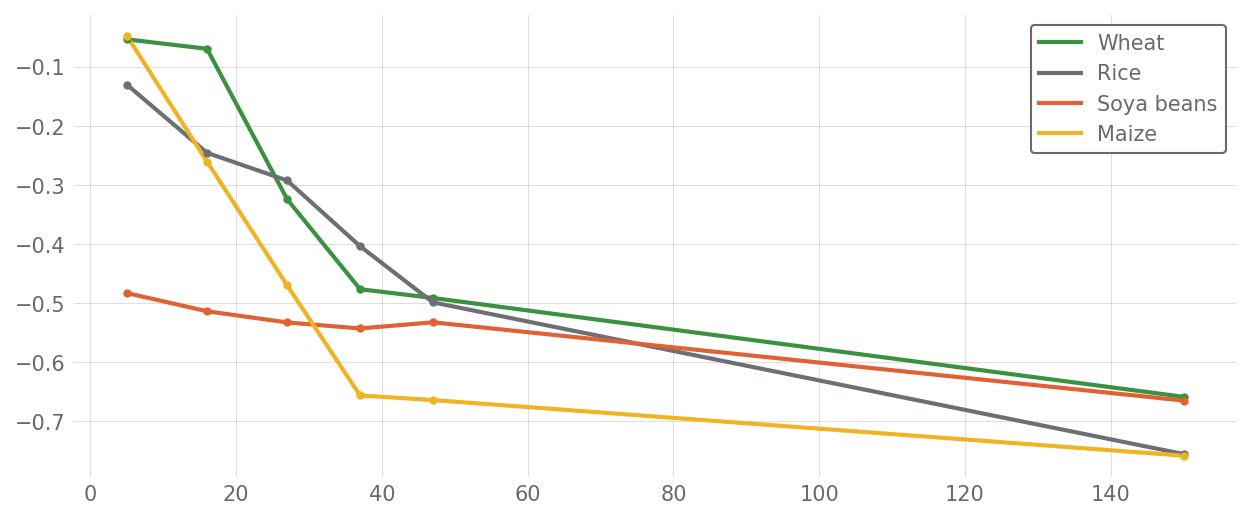

In [5]:
fig, ax = plt.subplots()
for crop in crops:
    network_df = crop_network_df[crop]
    # Plot nuclear winter size vs jaccard distance
    ax.plot(network_df['NW'], network_df['Jaccard Distance'], label=crop)
    # Also plot the points
    ax.scatter(network_df['NW'], network_df['Jaccard Distance'], zorder=5)
ax.legend()

Text(0, 0.5, 'Imports Relative Difference [%]')

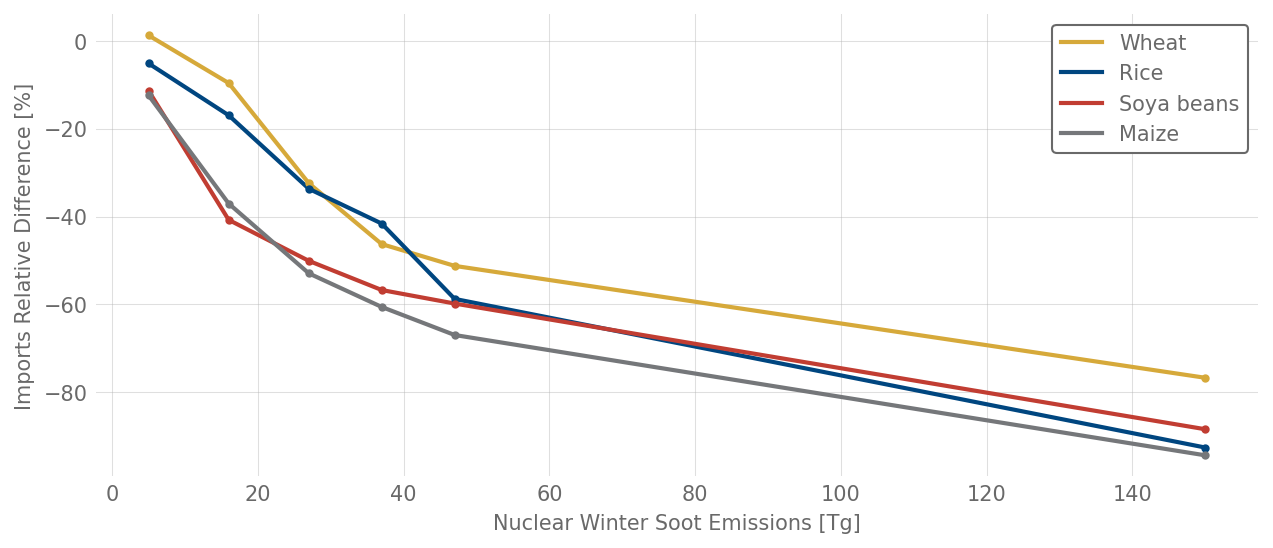

In [15]:
# Create new ax to plot the imports relative difference
colors = ["#d6a93a", "#004680", "#c13d32", "#75777a"]
fig, ax = plt.subplots()
for i, crop in enumerate(crops):
    network_df = crop_network_df[crop]
    # plot nuclear winter size vs imports relative difference
    ax.plot(network_df['NW'], network_df['Imports Relative Difference'], label=crop, color=colors[i])
    # Also plot the points
    ax.scatter(network_df['NW'], network_df['Imports Relative Difference'], zorder=5, color=colors[i])
ax.legend()
# Add labels
plt.xlabel('Nuclear Winter Soot Emissions [Tg]')
plt.ylabel('Imports Relative Difference [%]')

Next lets look at how the trade communities change globally in the different scenarios. 

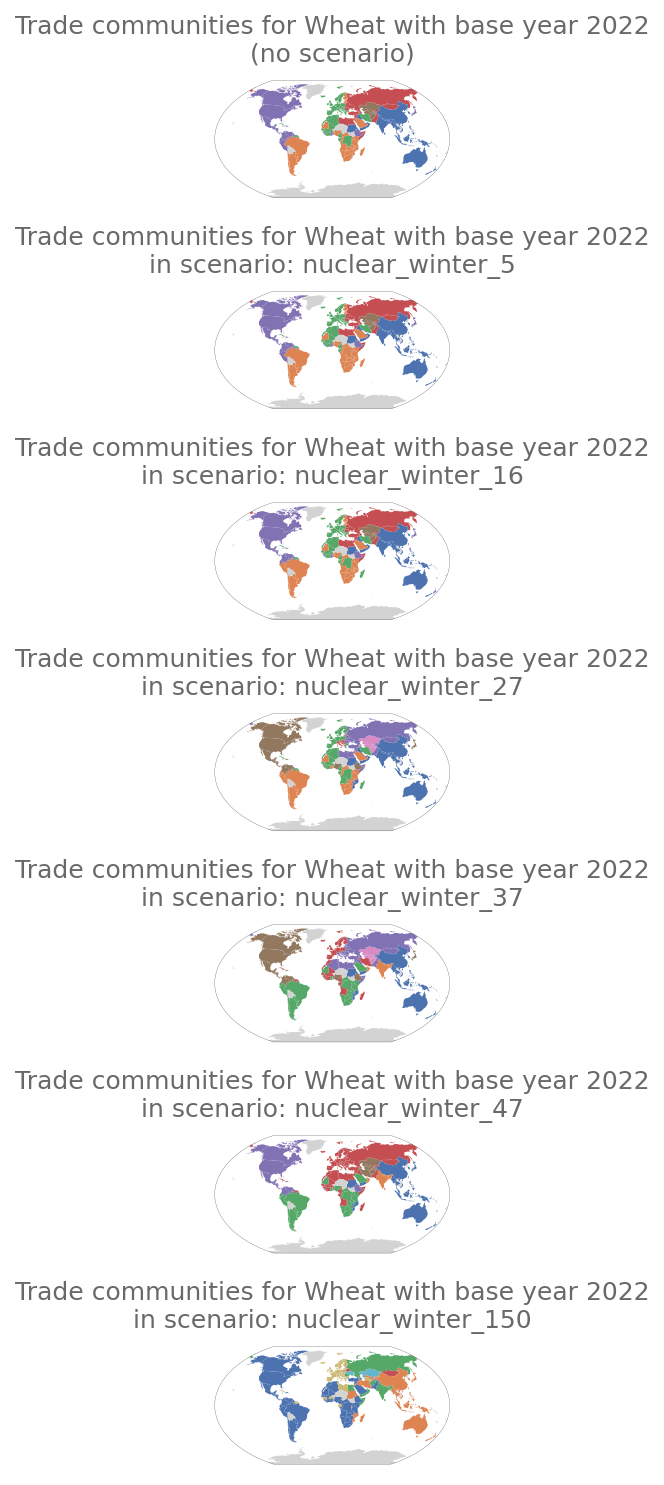

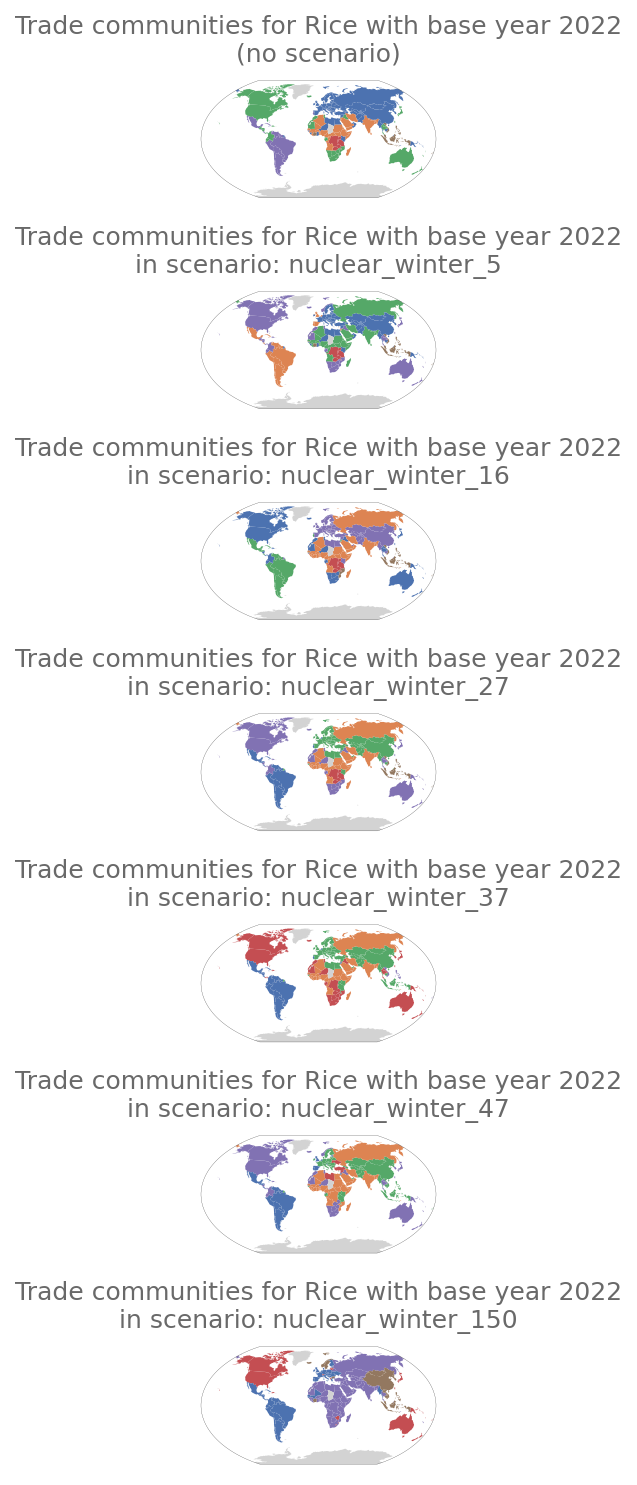

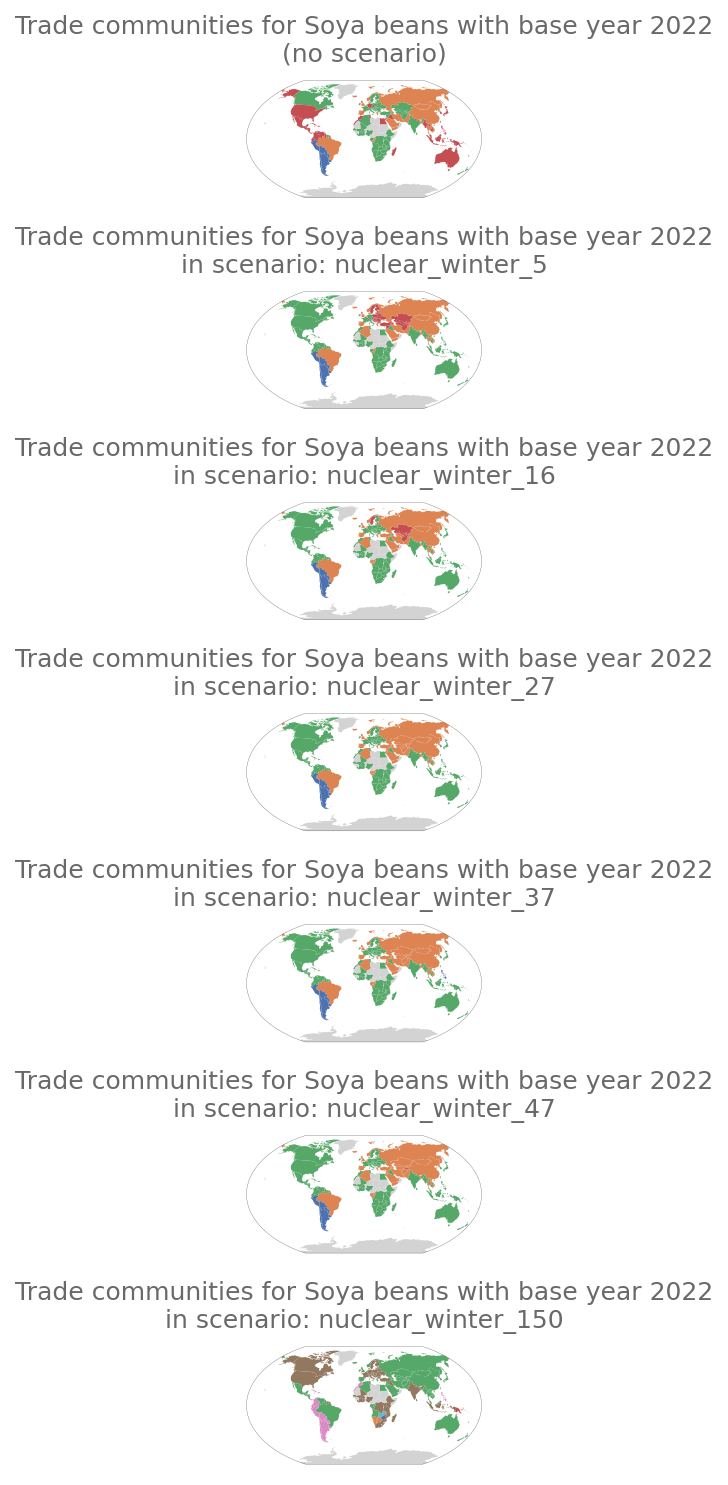

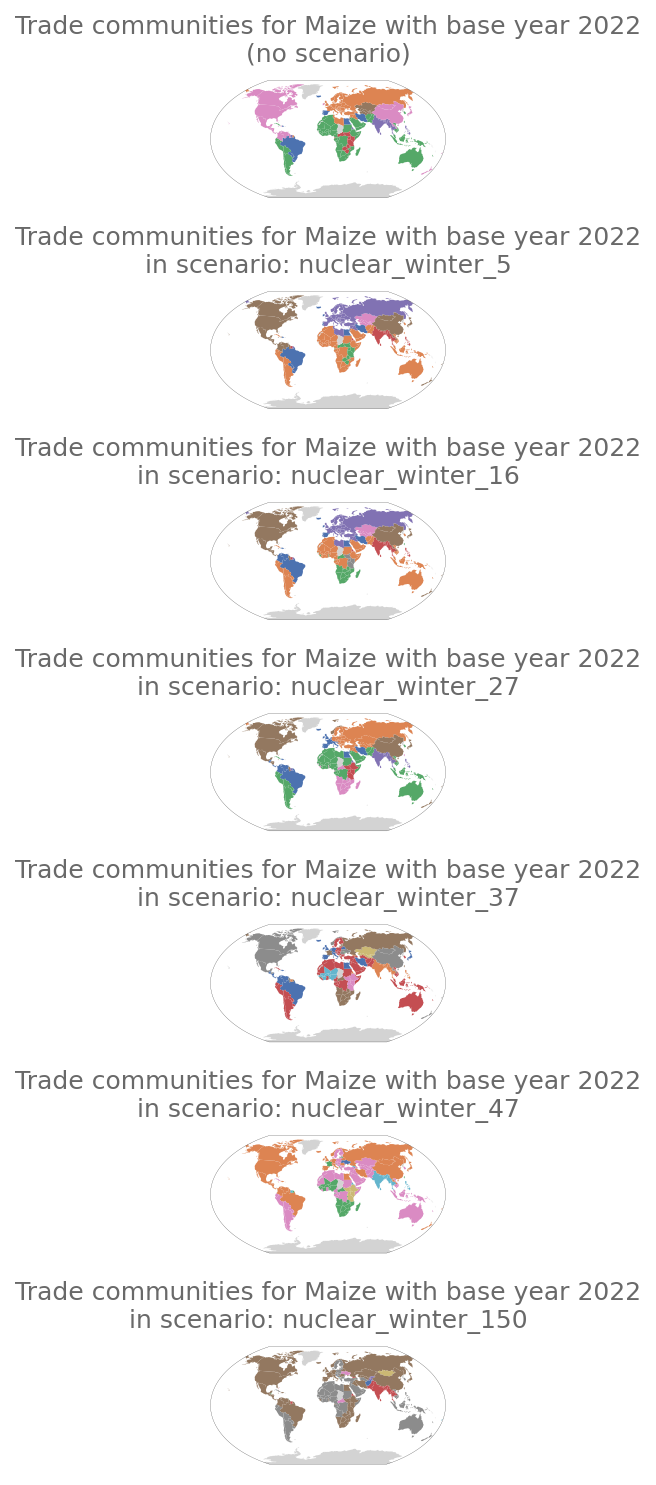

In [7]:
for crop in crops:
    crop_comparison[crop].plot_all_trade_communities(figsize=(15, 10))


We can also try to quantify how different the communities are in each scenario for each country.
The natural way of doing this is the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
It measures the similarity between two sets.
So for each country we can compute a Jaccard distance (1-Jaccard index)
showing us by how much for each country their community changed in comparison with the base scenario.

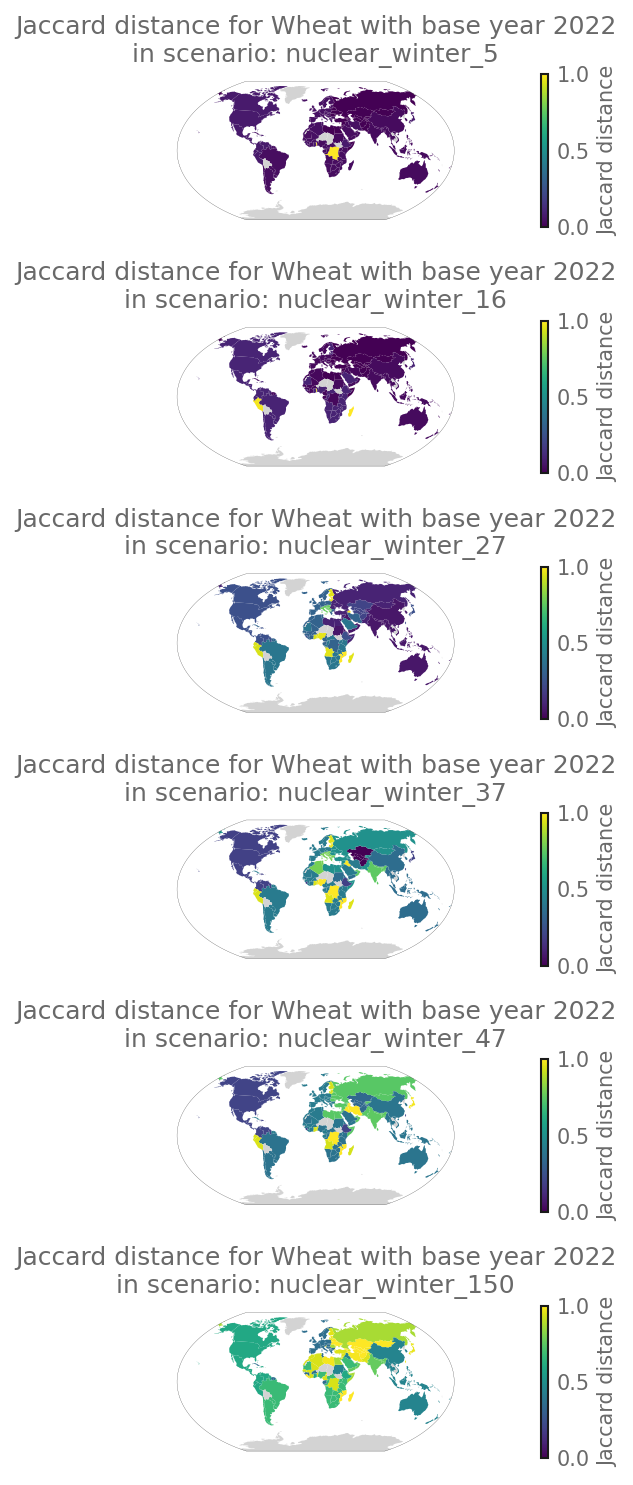

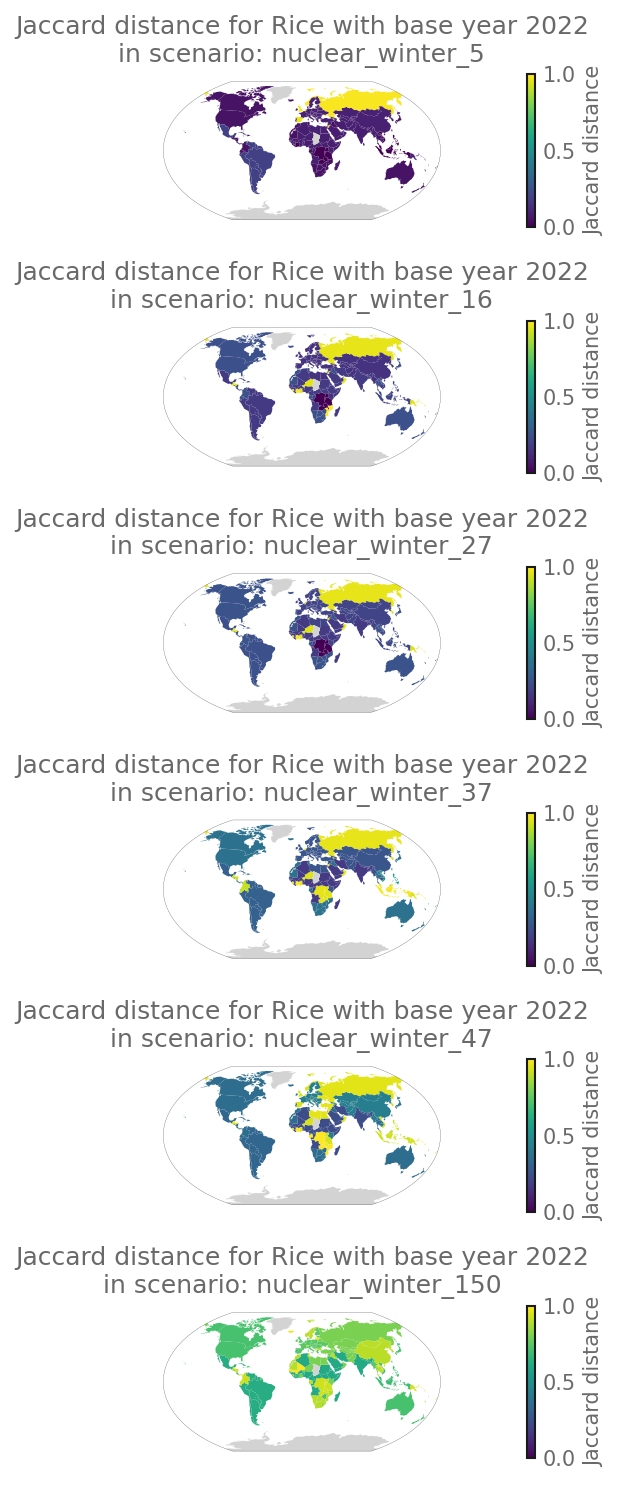

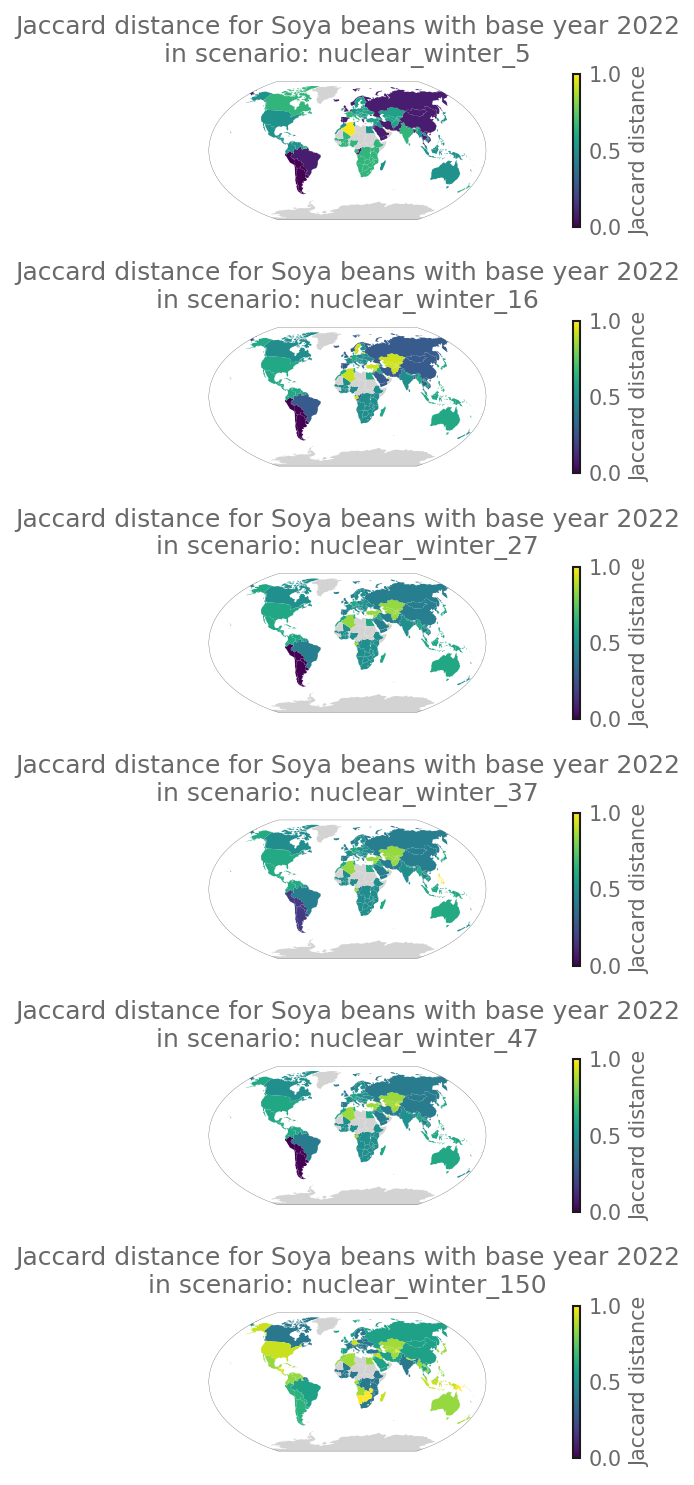

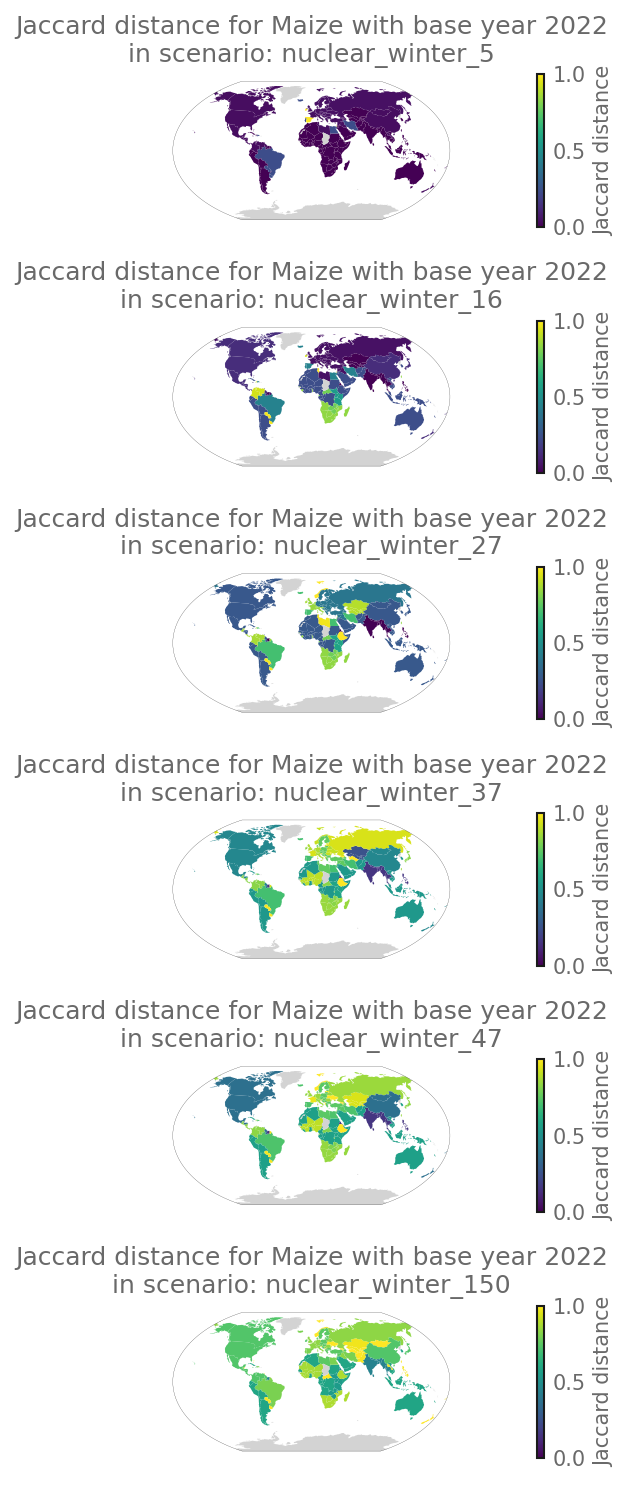

In [8]:
for crop in crops:
    crop_comparison[crop].plot_community_difference(figsize=(10, 10), vmin=0, vmax=1)


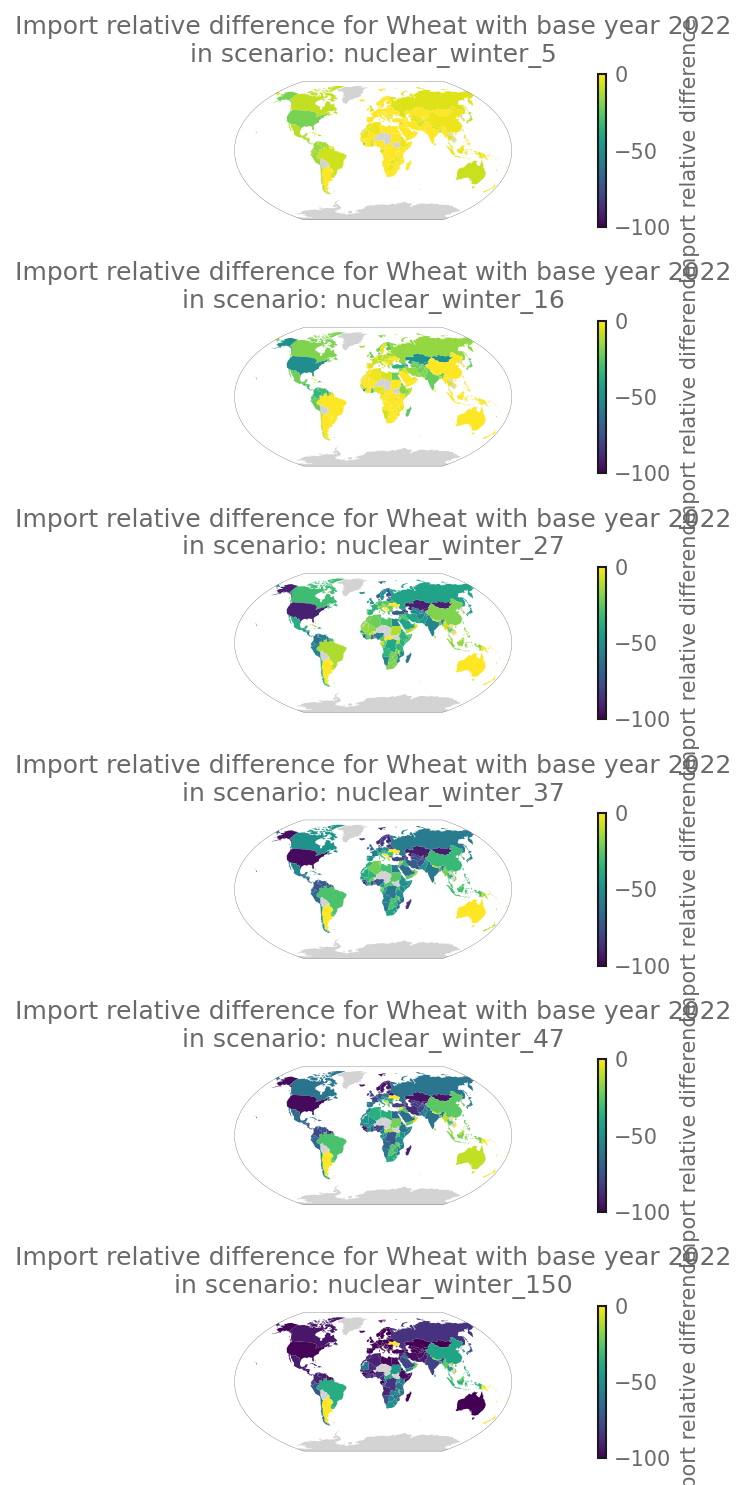

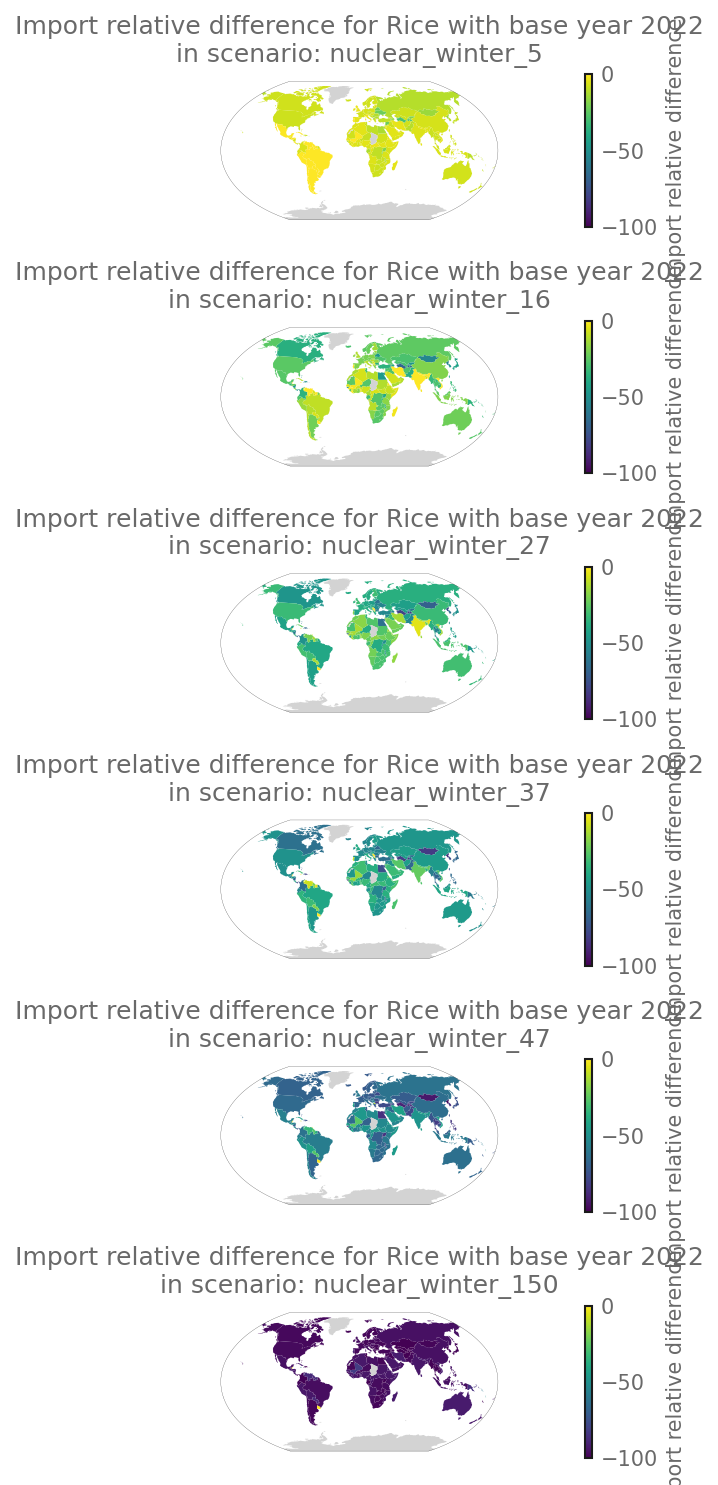

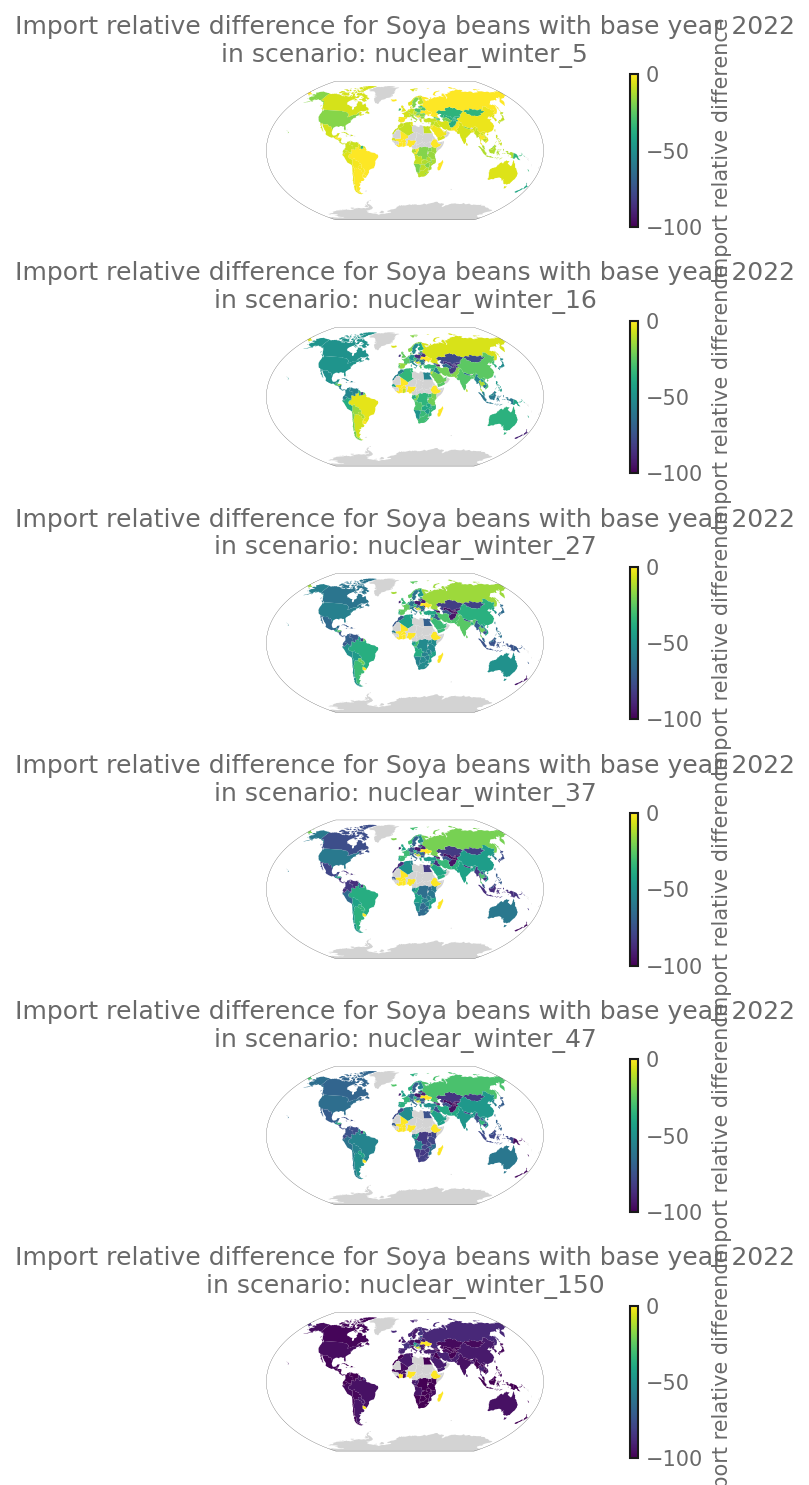

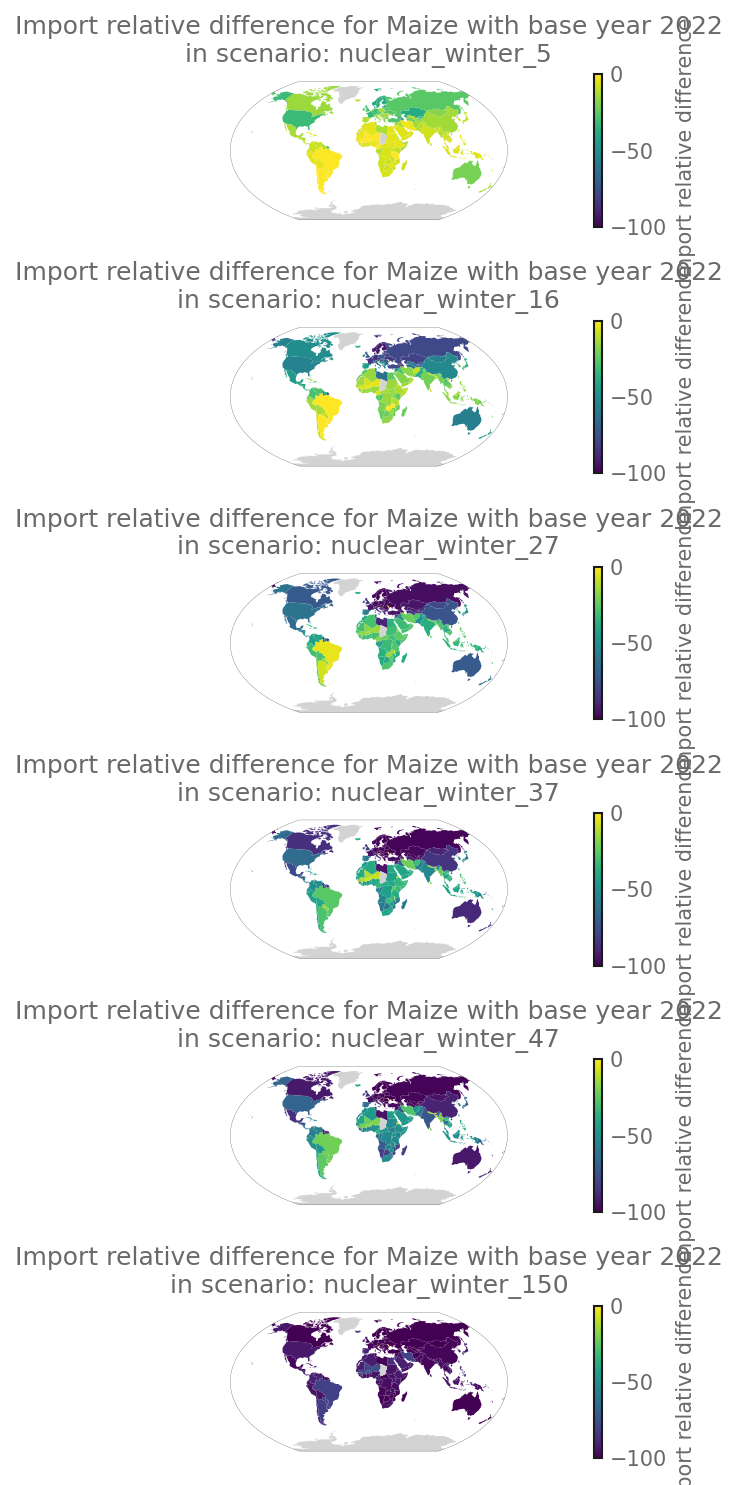

In [9]:
for crop in crops:
    crop_comparison[crop].plot_imports_difference(figsize=(10, 10), vmin=-100, vmax=0)


We can also study the degree centralities (in and out) for all networks:

In [10]:
for crop in crops:
    crop_comparison[crop].plot_jaccard_indices(figsize=(10, 10), vmin=0, vmax=1)


AttributeError: 'Postprocessing' object has no attribute 'plot_jaccard_indices'

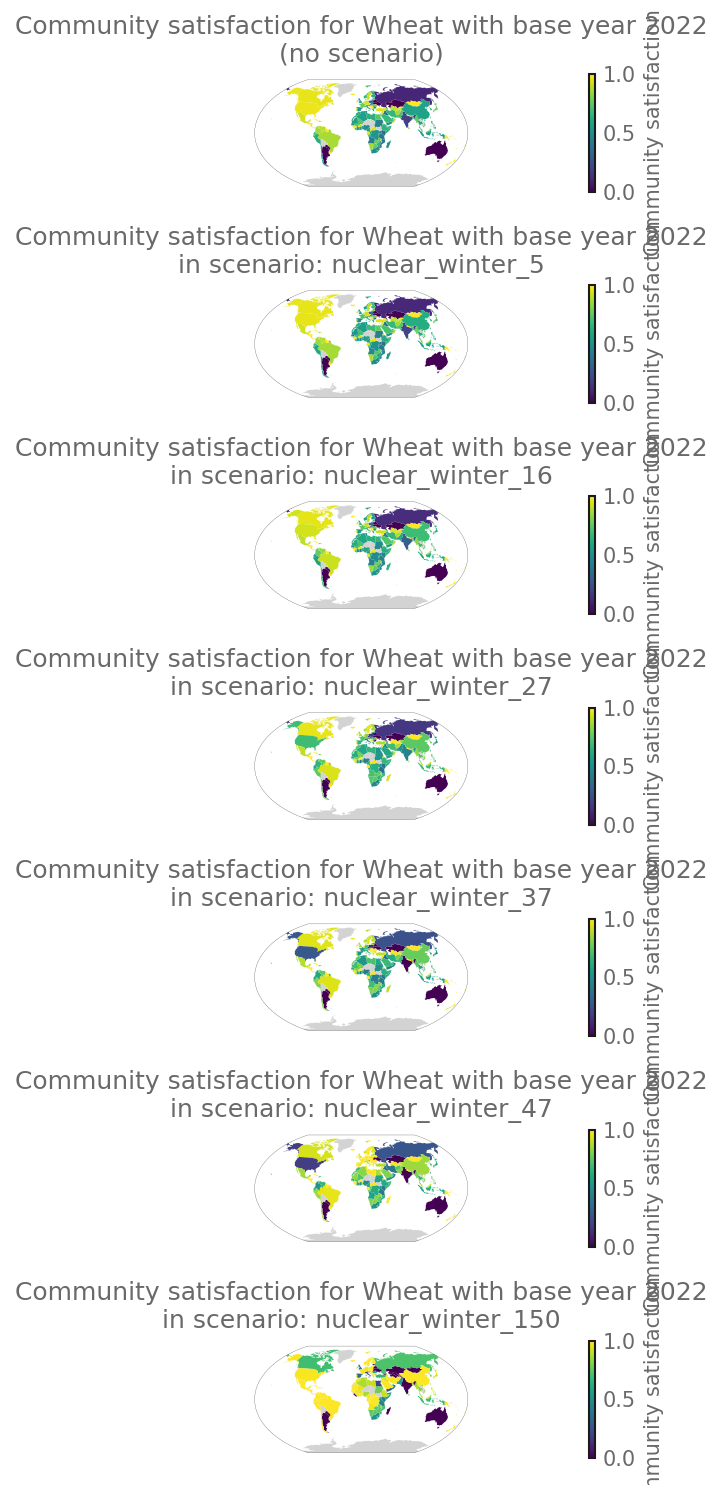

In [ ]:
for crop in crops:
    crop_comparison[crop].plot_community_satisfaction(figsize=(15, 10))


and the difference from base scenario:

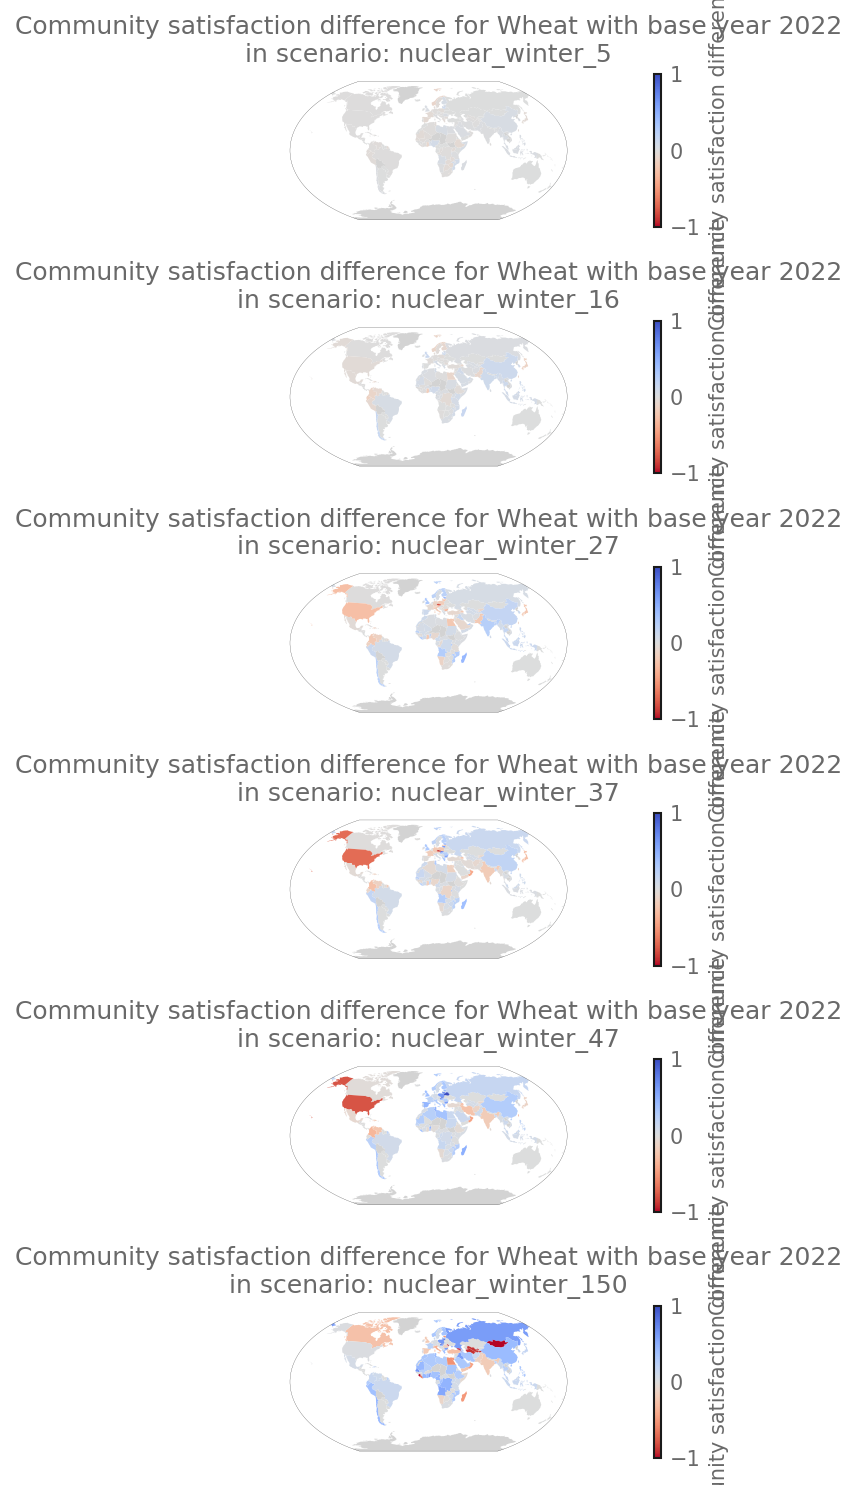

In [ ]:
for crop in crops:
    crop_comparison[crop].plot_community_satisfaction_difference(figsize=(10, 10), vmin=-1, vmax=1, cmap="coolwarm_r")


We also can look at country's stability index, which is a measure of how easily each country can replace their import partners (same paper as community satisfaction).

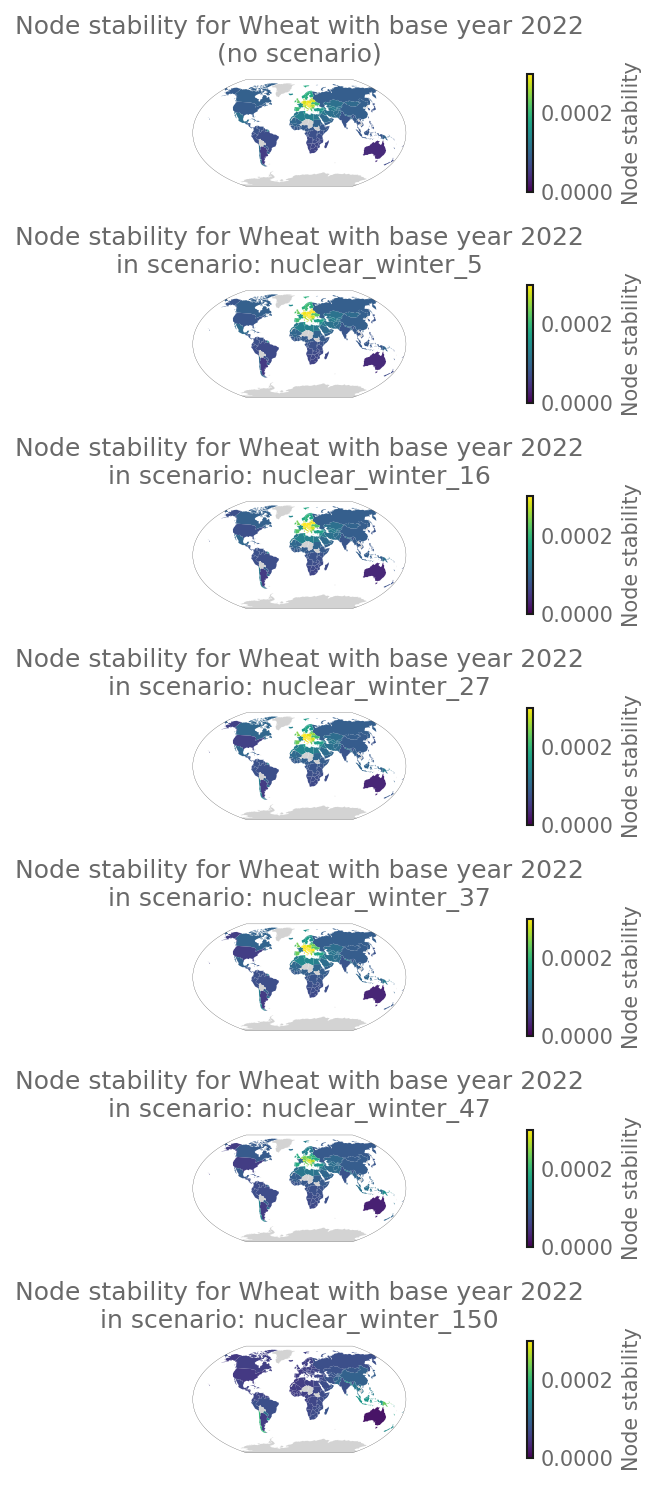

In [ ]:
for crop in crops:
    crop_comparison[crop].plot_node_stability(figsize=(15, 10), vmin=0, vmax=0.0003)


The units are dimensionless, so it is better to look at the relative change of the node stability to get a better view. 
For this reason we can look at the *relative* change of this metric:

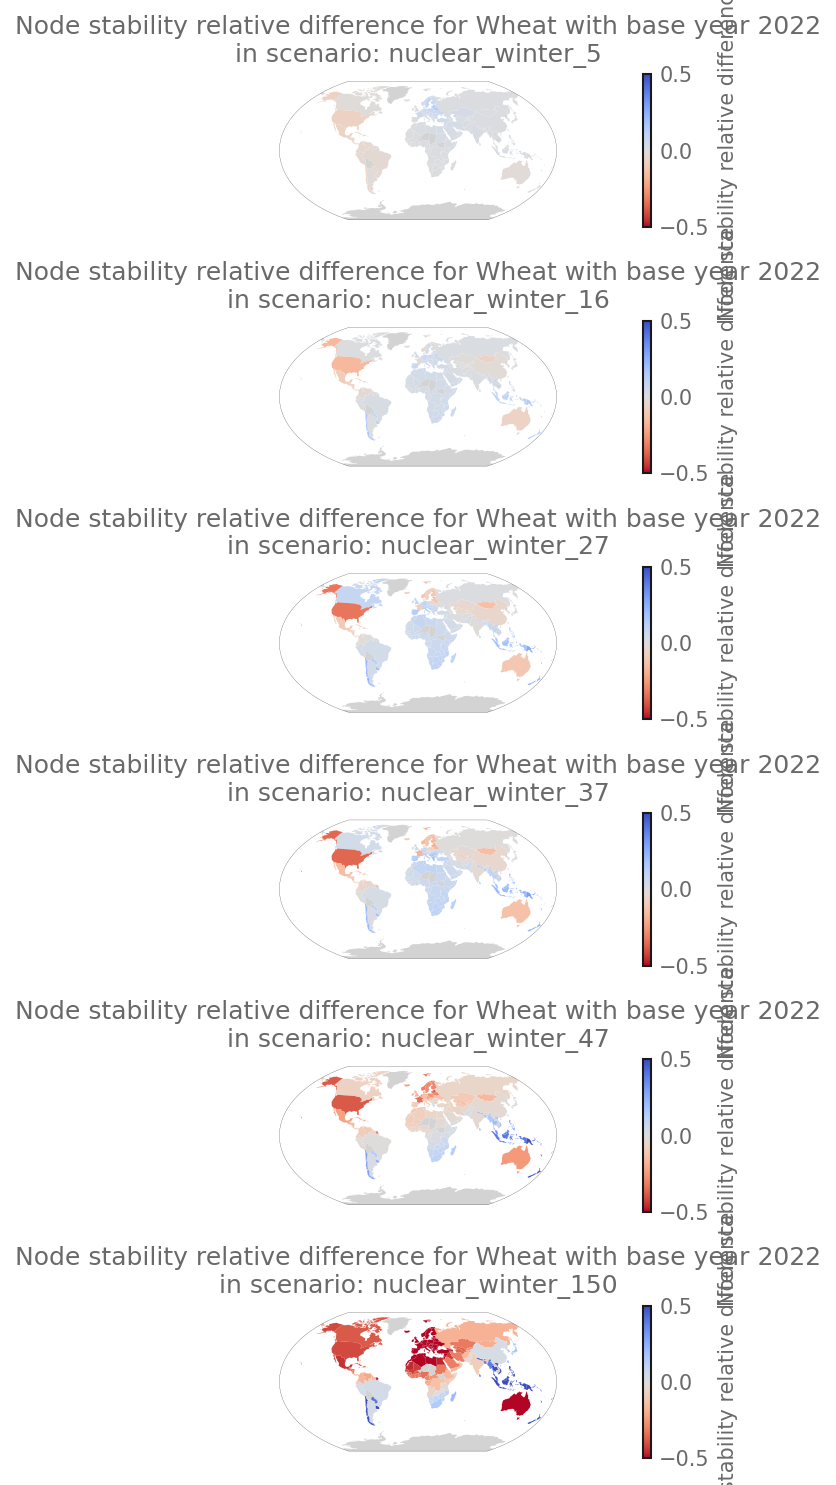

In [ ]:
for crop in crops:
    crop_comparison[crop].plot_node_stability_difference(figsize=(10, 10), vmin=-0.5, vmax=0.5, cmap="coolwarm_r")

